# Heart Disease 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2CNvoV7q-wMwLRCwjyO7O9npTh2Nt18E-JFjiN-TPPvB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'heartdiseasesgroup2ai1703-donotdelete-pr-qqoarkytdt3b3r'
object_key = 'heart.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

heart_df = pd.read_csv(body)
heart_df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 📑**Data Dictionary** 🗓

1. `age` - age in years
2. `sex` - (1 = male; 0 = female)
3. `cp` - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. `chol` - serum cholestoral in mg/dl
    * serum = LDL + HDL + 0.2 * triglycerides (LDL: Low-destiny lipoprotein) (HDL:High-destiny liporotein)
    * above 200 is cause for concern
6. `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. `restecg` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. `ca` - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. `thal` - thalium stress result
    * 1: normal
    * 2: fixed defect
    * 3: reversable defect
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Explore the Data 🔍

### Number of Cases (rows and columns)

In [4]:
heart_df.shape

(1025, 14)

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Check null values and Duplicated rows

In [6]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_df.duplicated().sum()

723

In [8]:
heartds_df = heart_df.drop_duplicates()

In [9]:
heartds_df.shape

(302, 14)

### Get overall about Dataset

In [10]:
heartds_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Number of people have / doesn't have heart Disease and 

In [11]:
heartds_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
heartds_df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [13]:
heartds_df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

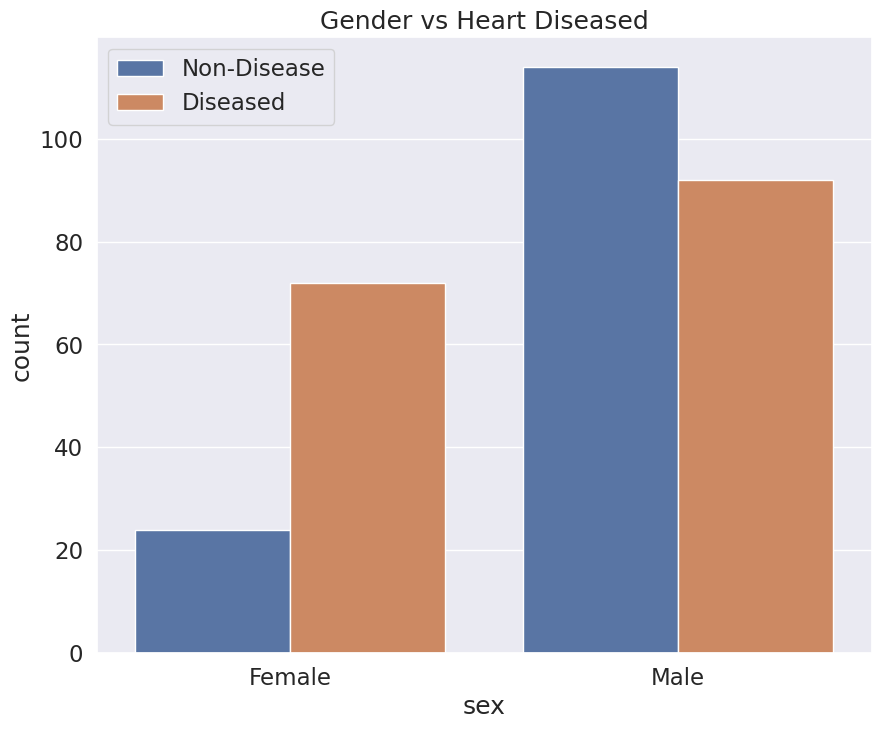

In [14]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.5)
sns.countplot(data = heartds_df,x = 'sex', hue = 'target');
plt.xticks([0,1],['Female','Male']);
plt.legend(labels = ['Non-Disease','Diseased']);
plt.title('Gender vs Heart Diseased');

### Is the Age related with Heart Diseased

Text(0.5, 1.0, 'Age Distribution')

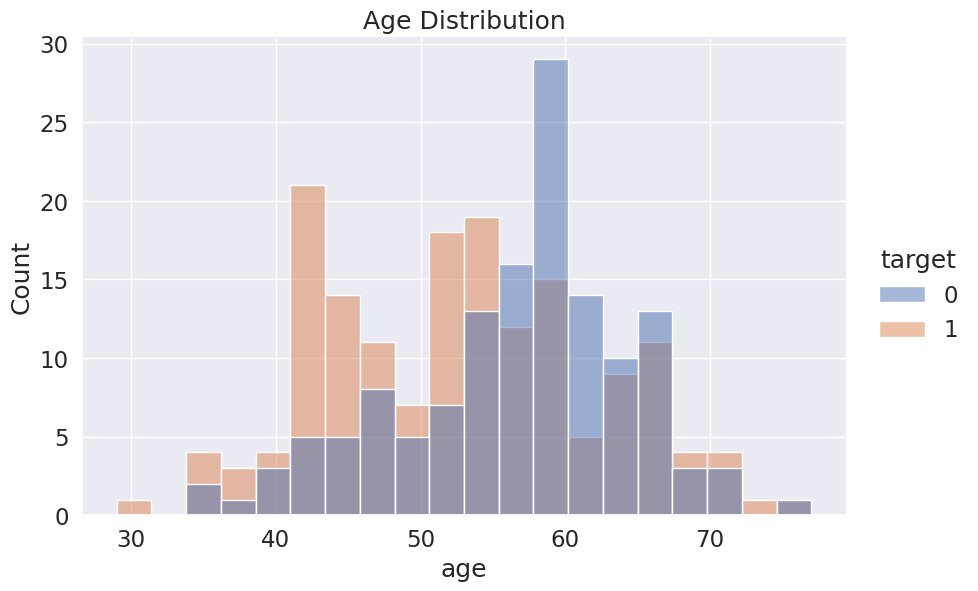

In [15]:
sns.set(font_scale = 1.5)
sns.displot(data = heartds_df, x = 'age', bins = 20,height=6, aspect=1.5, hue = 'target', legend = ['Non-disease', 'Heart-diseased']);
plt.title('Age Distribution')

### Check Chest Pain Type (cp)

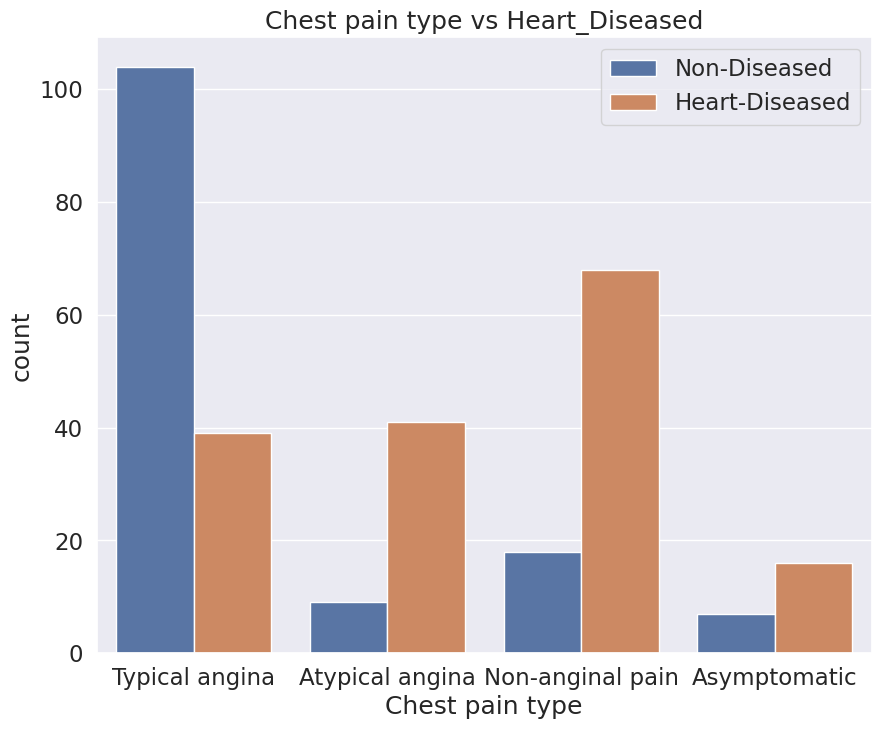

In [16]:
typeCP = ['Typical angina','Atypical angina','Non-anginal pain','Asymptomatic']
plt.figure(figsize = (10,8))
sns.countplot(x = 'cp',data = heartds_df, hue = 'target');
plt.xticks([0,1,2,3],typeCP);
plt.xlabel('Chest pain type');
plt.legend(labels = ['Non-Diseased',"Heart-Diseased"]);
plt.title('Chest pain type vs Heart_Diseased');

### Fasting Blood Sugar

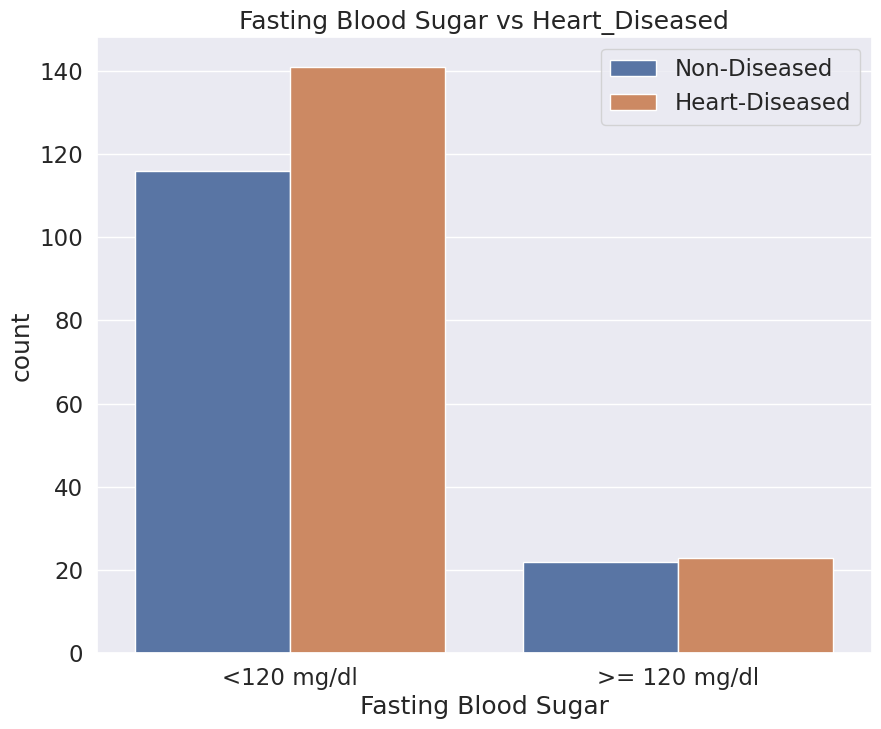

In [17]:
typeCP = ['<120 mg/dl','>= 120 mg/dl']
plt.figure(figsize = (10,8))
sns.countplot(x = 'fbs',data = heartds_df, hue = 'target');
plt.xticks([0,1],typeCP);
plt.xlabel('Fasting Blood Sugar');
plt.legend(labels = ['Non-Diseased',"Heart-Diseased"]);
plt.title('Fasting Blood Sugar vs Heart_Diseased');

### Resting Blood Pressure

In [18]:
heartds_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

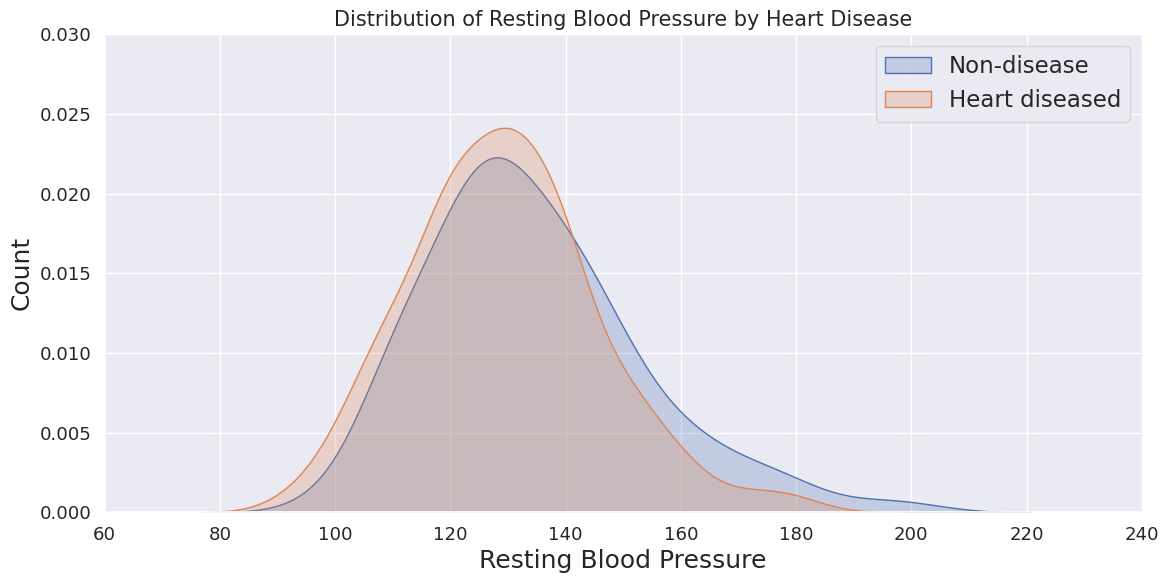

In [42]:
fg = sns.FacetGrid(data=heartds_df, hue='target', height=6, aspect=2)
fg.map(sns.kdeplot, 'trestbps', shade=True)

fg.set_axis_labels(x_var='Resting Blood Pressure', y_var='Count')
fg.set_xticklabels(fontsize=13)
fg.set_yticklabels(fontsize=13)
plt.legend(['Non-disease','Heart diseased']);
plt.title('Distribution of Resting Blood Pressure by Heart Disease', fontsize = 15)
plt.show()


In [20]:
categorical = []
continuous = []
for col in heartds_df.columns:
    if heartds_df[col].nunique()<=10:
        categorical.append(col)
    else:
        continuous.append(col)

In [21]:
print(categorical)
print(continuous)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


### Plot charts from Categorical and Continuous 

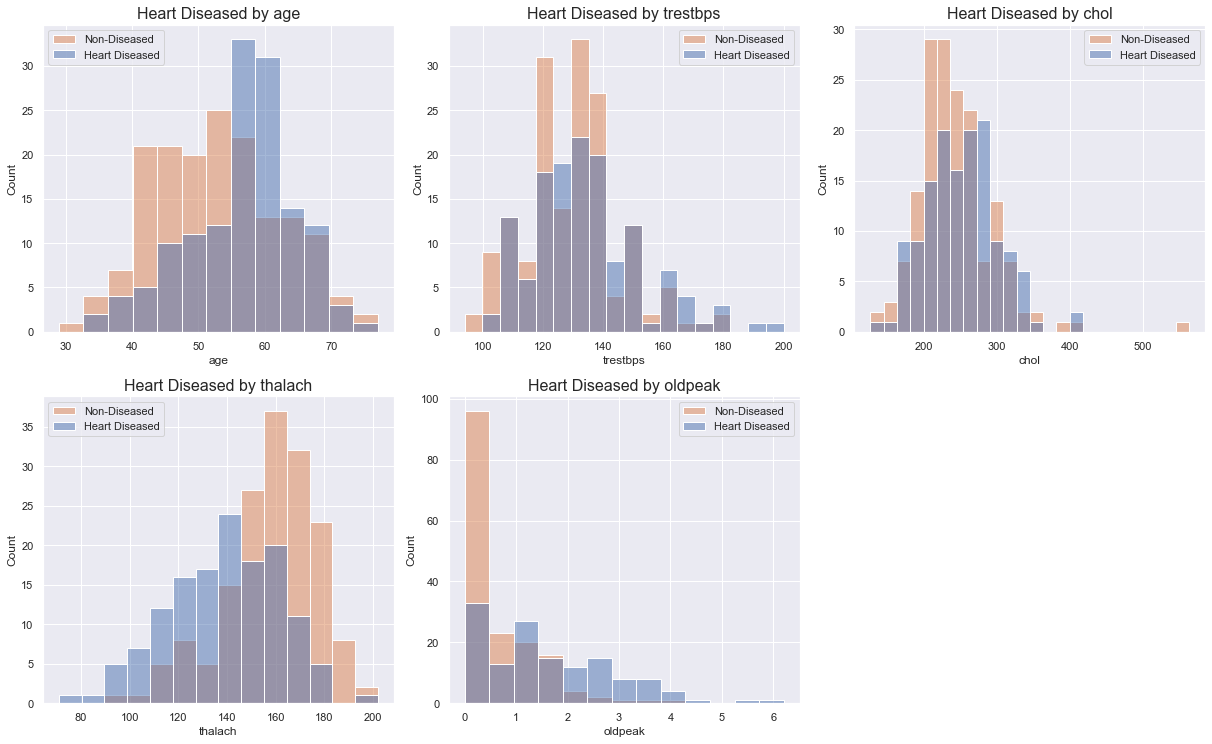

In [141]:
n_row = 2
n_col = 3

fig, ax = plt.subplots(nrows = n_row, ncols = n_col, figsize = (n_row*8.5, n_col*3.5))

k = 0
for i in range(0,n_row):
    for j in range(0,n_col):
        if (k<len(continuous)):
            ax_k = ax[i,j]
            sns.histplot(data = heartds_df, x = continuous[k], hue = 'target', ax = ax_k)
            ax_k.set_title('Heart Diseased by ' + continuous[k], fontdict = {'fontsize': 16})
            ax_k.legend(labels = ['Non-Diseased','Heart Diseased'])
        k+=1
        
ax.flat[-1].set_visible(False)        
plt.tight_layout()

### 📖 Note
> - `age` - age in years
> - `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
> - `chol` - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides (LDL: Low-destiny lipoprotein) (HDL:High-destiny liporotein)
    * above 200 is cause for concern
> - `thalach` - maximum heart rate achieved
> - `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

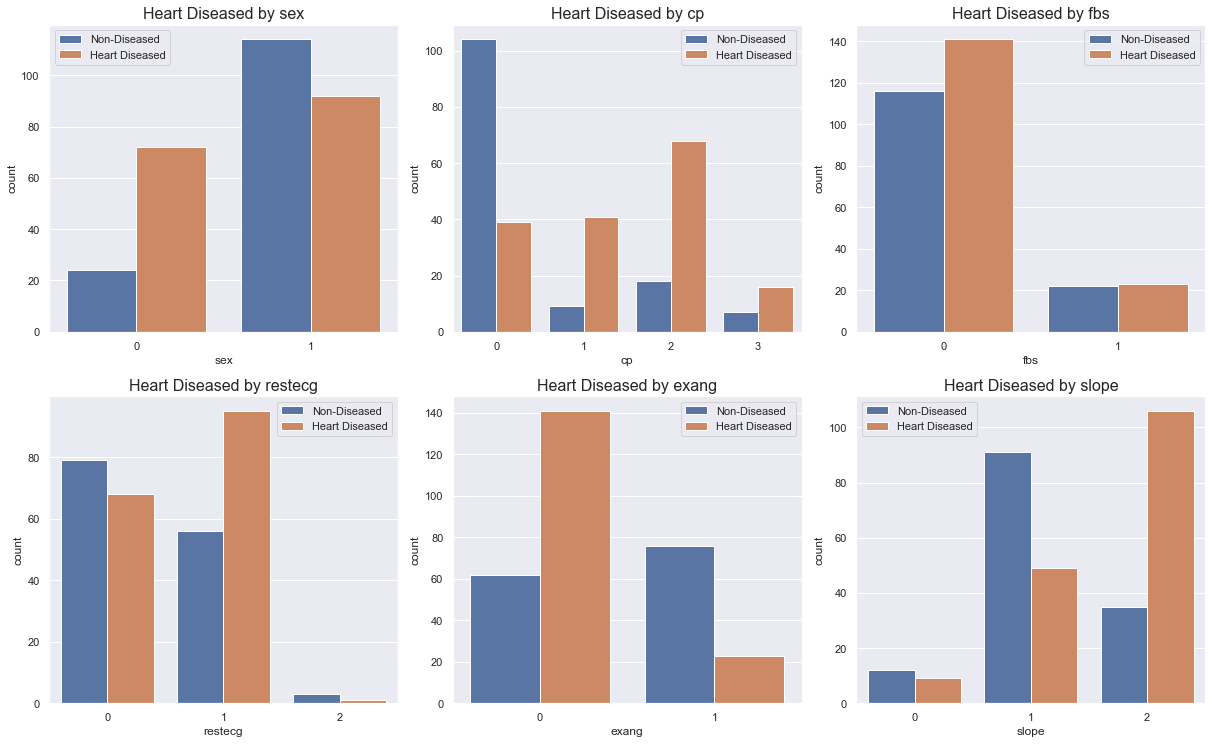

In [159]:
n_row = 2
n_col = 3

fig, ax = plt.subplots(nrows = n_row, ncols = n_col, figsize = (n_row*8.5, n_col*3.5))

k = 0
for i in range(0,n_row):
    for j in range(0,n_col):
        if (k<len(categorical)):
            ax_k = ax[i,j]
            sns.countplot(data = heartds_df, x = categorical[k], hue = 'target', ax = ax_k)
            ax_k.set_title('Heart Diseased by ' + categorical[k], fontdict = {'fontsize': 16})
            ax_k.legend(labels = ['Non-Diseased','Heart Diseased'])
        k+=1
            
plt.tight_layout()

### 📖 Note
> - `sex` - (1 = male; 0 = female)
> - `cp` - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
> - `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
> - `restecg` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
> - `exang` - exercise induced angina (1 = yes; 0 = no)
> - `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart

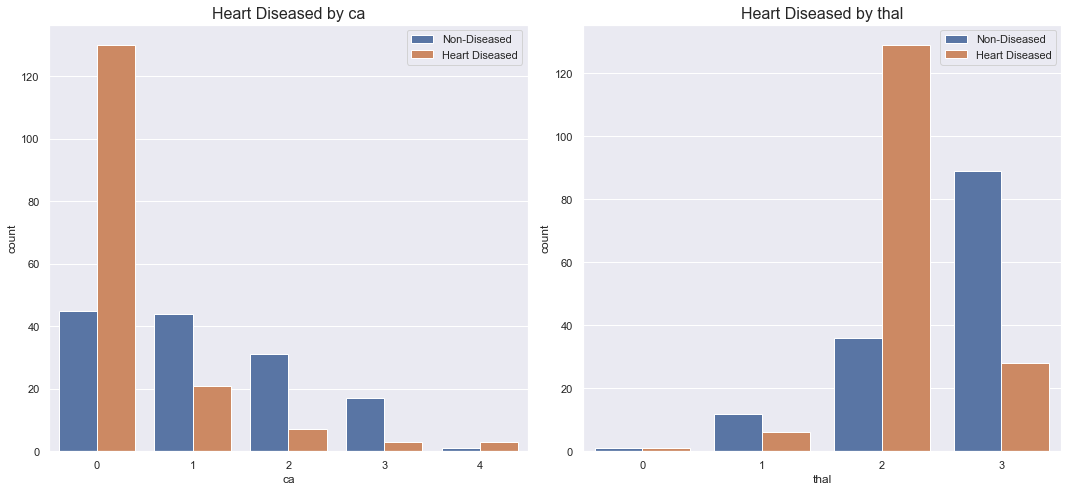

In [171]:
n_row = 1
n_col = 2

fig, ax = plt.subplots(nrows = n_row, ncols = n_col, figsize = (n_row*15, n_col*3.5))
cate =[ 'ca', 'thal']
k = 0
for i in range(0,n_row):
    for j in range(0,n_col):
        if (k<len(categorical)):
            ax_k = ax[j]
            sns.countplot(data = heartds_df, x = cate[k], hue = 'target', ax = ax_k)
            ax_k.set_title('Heart Diseased by ' + cate[k], fontdict = {'fontsize': 16})
            ax_k.legend(labels = ['Non-Diseased','Heart Diseased'])
        k+=1
            
plt.tight_layout()

### 📖 Note
> - `ca` - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
> - `thal` - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising

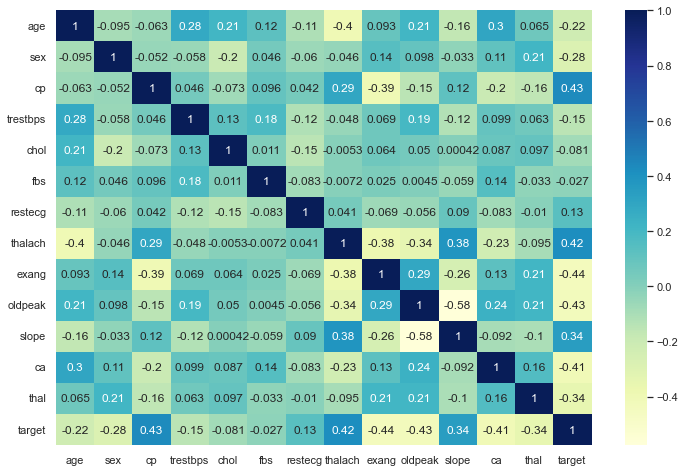

In [119]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1)
sns.heatmap(heartds_df.corr(), annot = True, cmap = 'YlGnBu');

#### Dataset from https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset